In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import math
import cv2
import matplotlib.pyplot as plt
import os
import seaborn as sns
import umap
from PIL import Image
import imageio
from os import listdir
from os.path import isfile, join
import numpy as np
from scipy import misc
from random import shuffle
from collections import Counter
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras.utils.np_utils import to_categorical


In [2]:
os.chdir('/kaggle/input/utkface-new')

In [3]:
os.chdir('UTKFace')

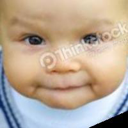

In [4]:
im =Image.open('1_0_0_20161219140623097.jpg.chip.jpg').resize((128,128))
im

In [5]:
onlyfiles = os.listdir()

In [6]:
len(onlyfiles)

23708

In [7]:
shuffle(onlyfiles)
age = [i.split('_')[0] for i in onlyfiles]

We can split the data into Classes
* Children (1-14) CLASS 0
* Youth (14-25) CLASS 1
*  ADULTS (25-40) CLASS 2
*  Middle age (40-60) CLASS 3
*  Very Old (>60) CLASS 4

In [8]:
classes = []
for i in age:
    i = int(i)
    if i <= 14:
        classes.append(0)
    if (i>14) and (i<=30):
        classes.append(1)
    if (i>30) and (i<46):
        classes.append(2)
    if (i>=46) and (i<60):
        classes.append(3)
    if i>=60:
        classes.append(4)

**CONVERT IMAGES TO VECTORS**

In [9]:
X_data =[]
for file in onlyfiles:
    face = imageio.imread(file)
    face =cv2.resize(face, (32, 32) )
    X_data.append(face)


In [10]:
X = np.squeeze(X_data)

In [11]:
X.shape

(23708, 32, 32, 3)

In [12]:
# normalize data
X = X.astype('float32')
X /= 255


In [13]:
classes[:10]


[4, 2, 2, 3, 1, 0, 2, 2, 1, 3]

In [14]:
categorical_labels = to_categorical(classes, num_classes=5)


In [15]:
categorical_labels[:10]


array([[0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 0., 1., 0.]], dtype=float32)

In [16]:
(x_train, y_train), (x_test, y_test) = (X[:13008],categorical_labels[:13008]) , (X[13008:] , categorical_labels[13008:])
(x_valid , y_valid) = (x_test[:1000], y_test[:1000])
(x_test, y_test) = (x_test[1000:], y_test[1000:])

In [17]:
len(x_test)
len(x_train)
len(x_valid)

1000

In [18]:
len(x_train)+len(x_test) + len(x_valid) == len(X)


True

In [19]:
model = tf.keras.Sequential()

# Must define the input shape in the first layer of the neural network
model.add(tf.keras.layers.Conv2D(filters=128, kernel_size=3, padding='same', activation='relu', input_shape=(32,32,3))) 
model.add(tf.keras.layers.MaxPooling2D(pool_size=2))
model.add(tf.keras.layers.Dropout(0.3))

model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=3, padding='same', activation='relu', input_shape=(32,32,3))) 
model.add(tf.keras.layers.MaxPooling2D(pool_size=2))
model.add(tf.keras.layers.Dropout(0.3))

model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(256, activation='relu'))
model.add(tf.keras.layers.Dropout(0.5))

model.add(tf.keras.layers.Dense(5, activation='softmax'))

# Take a look at the model summary
model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 128)       3584      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 128)       0         
_________________________________________________________________
dropout (Dropout)            (None, 16, 16, 128)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 16, 16, 64)        73792     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 8, 8, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 4096)              0

In [20]:
!pip install visualkeras
import visualkeras
visualkeras.layered_view(model).show() # display using your system viewer
visualkeras.layered_view(model, to_file='output.png') # write to disk
visualkeras.layered_view(model, to_file='output.png').show() # write and show

visualkeras.layered_view(model)

     |████████████████████████████████| 795 kB 2.1 MB/s 


OSError: [Errno 30] Read-only file system: 'output.png'

In [21]:
model.compile(loss='categorical_crossentropy',
             optimizer='sgd',
             metrics=['accuracy'])


In [22]:
model.fit(x_train,
         y_train,
         batch_size=100,
         epochs=15,
         validation_data=(x_valid, y_valid),)

Epoch 1/15
131/131 [==============================] - 40s 303ms/step - loss: 1.5339 - accuracy: 0.3603 - val_loss: 1.5104 - val_accuracy: 0.3550
Epoch 2/15
131/131 [==============================] - 39s 298ms/step - loss: 1.5000 - accuracy: 0.3755 - val_loss: 1.4898 - val_accuracy: 0.3600
Epoch 3/15
131/131 [==============================] - 39s 297ms/step - loss: 1.4779 - accuracy: 0.3773 - val_loss: 1.4808 - val_accuracy: 0.3980
Epoch 4/15
131/131 [==============================] - 39s 297ms/step - loss: 1.4669 - accuracy: 0.3782 - val_loss: 1.4376 - val_accuracy: 0.3820
Epoch 5/15
131/131 [==============================] - 38s 293ms/step - loss: 1.4383 - accuracy: 0.3925 - val_loss: 1.4443 - val_accuracy: 0.3780
Epoch 6/15
131/131 [==============================] - 39s 295ms/step - loss: 1.4221 - accuracy: 0.3920 - val_loss: 1.3928 - val_accuracy: 0.4210
Epoch 7/15
131/131 [==============================] - 39s 299ms/step - loss: 1.3955 - accuracy: 0.4048 - val_loss: 1.3664 - val_ac

In [23]:
# Evaluate the model on test set
score = model.evaluate(x_test, y_test, verbose=0)

# Print test accuracy
print('\n', 'Test accuracy:', score[1])


 Test accuracy: 0.5190721750259399


In [24]:
labels =["CHILD",  # index 0
        "YOUTH",      # index 1
        "ADULT",     # index 2 
        "MIDDLEAGE",        # index 3 
        "OLD",         # index 4
        ]

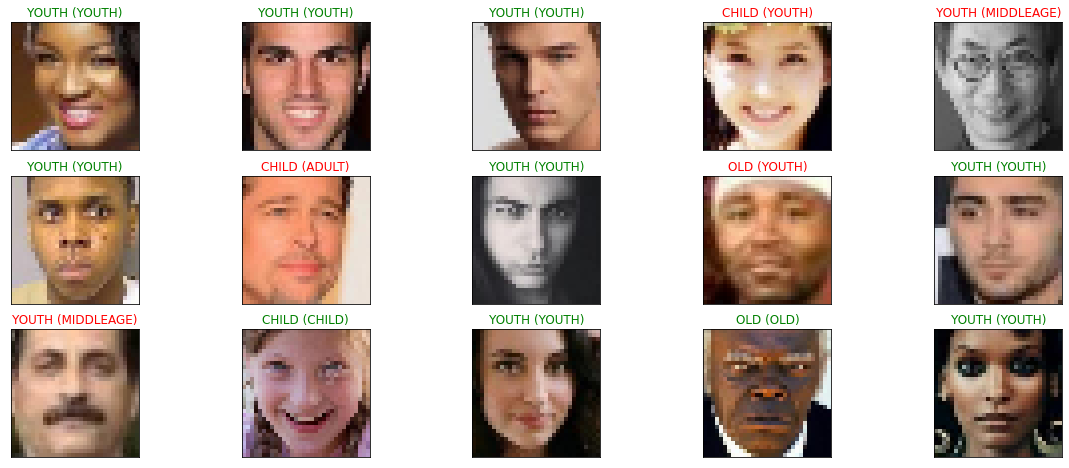

In [25]:
y_hat = model.predict(x_test)

# Plot a random sample of 10 test images, their predicted labels and ground truth
figure = plt.figure(figsize=(20, 8))
for i, index in enumerate(np.random.choice(x_test.shape[0], size=15, replace=False)):
    ax = figure.add_subplot(3, 5, i + 1, xticks=[], yticks=[])
    # Display each image
    ax.imshow(np.squeeze(x_test[index]))
    predict_index = np.argmax(y_hat[index])
    true_index = np.argmax(y_test[index])
    # Set the title for each image
    ax.set_title("{} ({})".format(labels[predict_index], 
                                  labels[true_index]),
                                  color=("green" if predict_index == true_index else "red"))
plt.show()
